In [1]:
#Arabic NEWS classification data
#https://www.kaggle.com/code/khalilalla/textmining-project

In [9]:
#location file => C:\Users\HP\Desktop\Backupdossier\Master Recherche(M1) SDIA\S3\NLP\للغة العربية NLP - Arabic Natural Language Processing\TP\Text_Classification\arabic_dataset_classifiction.csv

# Import Libraries

In [23]:
import os
import random
import pandas as pd
import numpy as np

import re
import string

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.isri import ISRIStemmer

import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Input

In [4]:
df = pd.read_csv("./arabic_dataset_classifiction.csv/arabic_dataset_classifiction.csv")

In [5]:
df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


# Data Cleaning

In [13]:
print(np.sum(df.isnull().any(axis=1)))

2939


<AxesSubplot:>

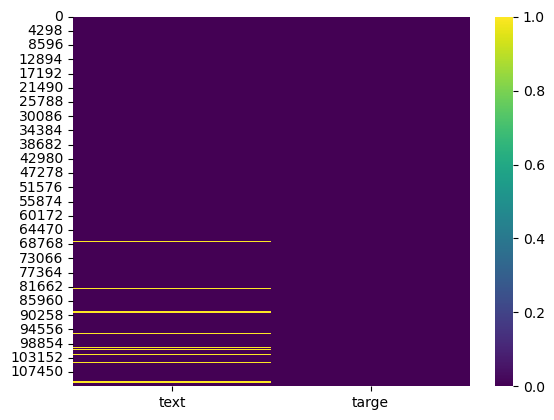

In [24]:
sns.heatmap(df.isnull(),cmap='viridis')

In [14]:
clean_df = df.dropna()

In [16]:
print(np.sum(clean_df.isnull().any(axis=1)))

0


In [17]:
print(df.isnull().any(axis=0))

text      True
targe    False
dtype: bool


In [18]:
print(clean_df.isnull().any(axis=0))

text     False
targe    False
dtype: bool


In [19]:
clean_df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


In [20]:
clean_df.iloc[0]

text     بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...
targe                                                    0
Name: 0, dtype: object

In [21]:
clean_df.iloc[0,0]

'بين أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ثم الرباط والبيضاء انتهى المخرج المغربي سهيل بن بركة من تصوير مشاهد عمله السينمائي الجديد الذي خصصه لتسليط الضوء عن حياة الجاسوس الإسباني دومينغو باديا الذي عاش فترة من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفة يصور حياة علي باي العباسي الذي ما زال أحد أحياء طنجة يحمل اسمه عاش حياة فريدة متنكرا بشخصية تاجر عربي من سلالة الرسول صلى الله عليه وسلم فيما كان يعمل جاسوسا لحساب إسبانيا وكشف مخرج الفيلم سهيل بن بركة في تصريح لهسبريس أن الفيلم السينمائي دخل مرحلة التوضيب التي تتم خارج المغرب مبرزا أن الفيلم الذي يروي حياة الجاسوس الإسباني دومينغو باديا منذ أن قرر من طنجة بدء رحلاته نحو عدد من المناطق في العالم الإسلامي بداية القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عددا من الممثلين من مختلف الجنسيات واختار لدور البطولة الممثلة السينمائية الإيطالية كارولينا كريشنتيني للقيام بدور الإنجليزية الليدي هستر ستانهوب التي اشتهرت في الكتب الغربية بـ زنوبيا والتي عاشت بدورها بالدول العربية وارتب

In [22]:
clean_df.iloc[40,0]

'أخبارنا المغربية حنان سلامة ذكرت مصادر تونسية أن مصالح الامن التونسي اعتقلت مغني الراي الجزائري رضا الطالياني الأحد بمدينة الحمامات السياحية بعد عملية مداهمة مفاجئة وأضاف ذات المصدر أن عملية التوقيف تمت من قبل فرقة أمن الملاهي التابعة لوحدات التدخل بالحمامات حيث عثر بحوزته على مادة الكوكايين وبعد استشارة النيابة العمومية تم إيداع المغني رضا الطالياني الحبس المؤقت على ذمة التحقيق للإشارة فإن الطالياني كان من المنتظر أن يحي اليوم الإثنين حفلا فنيا بالعاصمة الرباط لكن تم إلغاؤه بسبب الاعتقال المفاجئ'